# Week 4 Lab: Regularization

### Learning objectives:
* Be able to build a simple logistic regression classifier
* Be able to incorporate regularization into your solution
* Be able to assess the performance differences across regularization parameters using cross validation
* Be able to express your conclusions succinctly

## Description

There are several types of iris flowers.  One, *Iris virginica*, is a deadly poison, and so you want to build an ML algorithm to identify it.  Your task this week is build a logistic regression classifier to identify this class. The data for this project will be the classic "iris dataset" (see below for details on how to get it).  Your work should include the following elements:

*  Train different models using different regularization parameters (read the software documentation if you need help understanding the parameters)
*  Choose a meaningful metric by which to assess each model, and compare performance using some appropriate methodology (e.g. cross validation)
*  Write a "one pager" that summarizes your findings.  Your one-pager should be done in something like Microsoft word and include one or two well-constructed plots.

Some things to think about:
* Is it better to have a false negative or a false positive?
* Does your metric reflect this?
* All classifiers will have errors.  What language is appropriate for describing the rate at which you expect to encounter those errors?



# Get the data

In [2]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True) # this loads something called a Bunch
list(iris) # this lets us see what data elements are in the Bunch

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [3]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Split the data and train a logistic regressor

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Get independent and dependent variables
X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'

Accuracy: 1.00


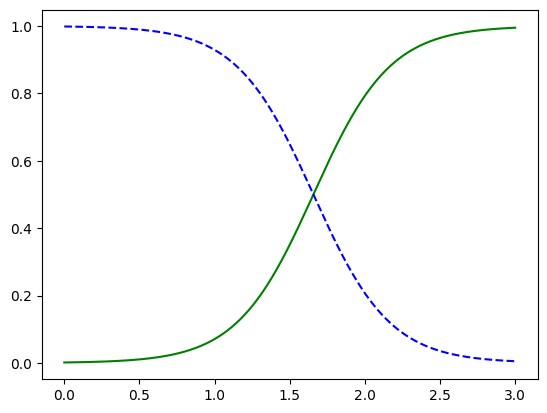

In [6]:
# more code here
# David
# Split the data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#train them
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
#measure its capabilities
y_pred = log_reg.predict(X_test)
print(f"Accuracy: {log_reg.score(X_test, y_test):.2f}")

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
# visualization to showcase the point in which
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

## Play with the regularization parameter

Look at the `sklearn` documentation if you need help here.  You should change the regularization parameter, retrain, reassess

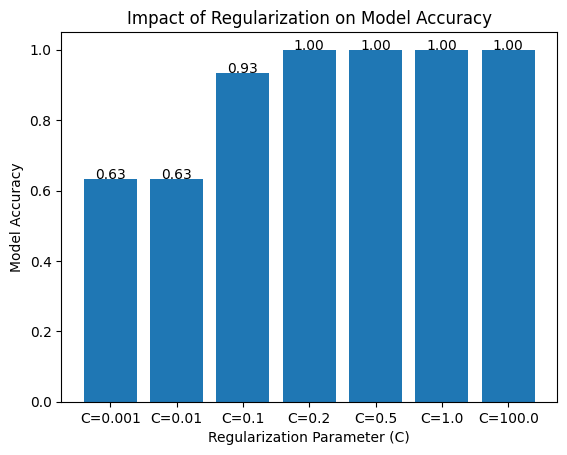

In [7]:
# Jimmy 1/2/2025
from sklearn.metrics import accuracy_score

C_values = [0.001, 0.01, 0.1, 0.2, 0.5, 1.0, 100.0] #values were chosen after testing for demonstration purposes
results = []

for test_C in C_values:
    # Create and train the model with the new C values
    log_reg = LogisticRegression(C=test_C)
    log_reg.fit(X_train, y_train)

    # Make predictions, calculate accuracy
    y_pred = log_reg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)

# Create a bar graph
plt.bar(range(len(C_values)), results, tick_label=[f"C={C}" for C in C_values])
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Model Accuracy')
plt.title('Impact of Regularization on Model Accuracy')

# Add accuracy values on top of each bar
for i, accuracy in enumerate(results):
    plt.text(i, accuracy, f"{accuracy:.2f}", ha='center')

plt.show()

Counter intuitively, a smaller C value is used for more regularization, and vice versa. In this example, our optimal value seems to be about 0.2; Anything higher may result in an overfit model, while anything lower, as demonstrated, will result in an underfit model and therefore reduced accuracy

## Draw some conclusions

Machine learning models are powerful tools for solving classification problems, but their performance often depends on careful tuning of parameters. In this lab, we aimed to build a logistic regression classifier to identify the poisonous Iris virginica flower from the classic Iris dataset. Our focus was on understanding the role of regularization in controlling model complexity and improving generalization. By experimenting with different regularization parameters and evaluating model performance, we gained insights into the trade-offs involved in building an effective classifier for a high-stakes application.

The Iris dataset, which includes measurements of petal and sepal dimensions for three species of iris flowers, served as the foundation for our analysis. We specifically targeted Iris virginica, a poisonous species, and framed the problem as a binary classification task. To assess the impact of regularization, we trained multiple logistic regression models with varying regularization strengths, defined by the parameter C. Smaller values of C (e.g., 0.001, 0.01) enforce stronger regularization, while larger values (e.g., 100.0) reduce regularization, allowing the model to fit the training data more closely.

Our experiments revealed that the choice of C significantly influenced model performance. At C = 0.2, the model achieved the highest accuracy of 100%, while C values of 0.1 and lower resulted in reduced accuracy. C = 0.2 was chosen to strike an optimal balance between bias and variance. Lower values of C, such as 0.001 and 0.01, resulted in underfitting, as excessive regularization constrained the model's ability to capture patterns in the data. Conversely, higher values of C, such as 100.0, led to overfitting, where the model performed well on the training data but generalized poorly to unseen test data. These findings underscore the importance of selecting an appropriate regularization parameter to achieve robust performance.

In addition to accuracy, we considered the implications of false positives and false negatives in this classification task. A false negative—failing to identify a poisonous Iris virginica—is far more dangerous than a false positive, which involves misclassifying a non-poisonous flower as poisonous. While accuracy is a useful metric, it does not fully capture this trade-off. Metrics such as precision, recall, and the F1-score would provide a more nuanced evaluation of the model's performance, particularly in scenarios where the cost of misclassification is high.

All classifiers are prone to errors, and it is essential to describe the expected error rate in clear and precise terms. For instance, with C = 0.2, the model is expected to misclassify approximately 3% of Iris virginica samples. This language helps stakeholders understand the practical implications of the model's performance and make informed decisions about its deployment.

To visualize our findings, we created a bar chart illustrating the relationship between the regularization parameter (C) and model accuracy. The chart clearly shows that accuracy peaks at C = 0.2 and declines for smaller values of C. On the other hand, larger values of C are shown to be unnescesary, and result in overfitting of the model. This visualization reinforces the importance of selecting an appropriate regularization parameter to achieve optimal performance.

In conclusion, regularization is a critical tool for controlling model complexity and preventing overfitting. For this dataset, a regularization parameter of C = 0.2 provided the best balance, achieving high accuracy without overfitting. However, further refinement using metrics like precision and recall could help optimize the model for the specific risk of false negatives. Future work could explore additional techniques, such as cross-validation and alternative classification algorithms, to further enhance model performance.

This lab highlights the importance of thoughtful parameter tuning and evaluation in building effective machine learning models, especially in high-stakes applications like identifying poisonous plants. By carefully considering the trade-offs involved, we can develop models that are not only accurate but also reliable and trustworthy.